In [4]:
## Importing pandas and boto3
import boto3 
import pandas as pd

## Defining the bucket
s3 = boto3.resource("s3")
bucket_name = "oscar-bustos-data445-bucket"
bucket = s3.Bucket(bucket_name)

## Defining the file
file_key = "Real_Estate.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get("Body")

## Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
## Dropping the NO column
house_price = house_price.drop(columns = ["No"])
house_price.head()

KeyError: "['No'] not found in axis"

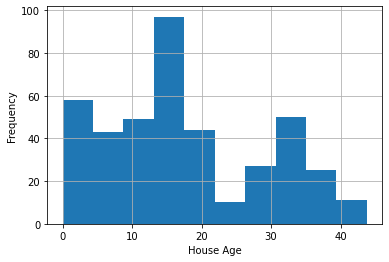

In [14]:
import matplotlib.pyplot as plt
plt.hist(house_price['house_age'])
plt.xlabel("House Age")
plt.ylabel("Frequency")
plt.grid()

## The graph is right-skewed, bi-model distribution

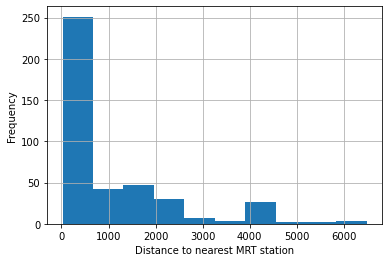

In [16]:
plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.xlabel("Distance to nearest MRT station")
plt.ylabel("Frequency")
plt.grid()

## The histogram is right skewed distribution, peak at 400.

In [ ]:
from sklearn.linear_model import LinearRegression

## Defining the input variable and target variable
X = house_price(["house_age",'distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude'])
Y = house_price(['house_price_of_unit_area'])

## Building the model
lm_md = LinearRegression().fit(X,Y)
lm_md.coef_